# 🧮 Day 05 – Customer Spend & Loyalty Insights (Mini-Project)

---

## 🧠 Project Overview

In this project, I explored a simulated e-commerce dataset to understand customer behavior and segment them based on spending patterns.

The goal was to answer real-world questions like:
- Who are our top spenders?
- How frequently do customers purchase?
- Can we segment users into tiers?
- What does the monthly spend trend look like?

I used **Pandas**, **Seaborn**, and **Matplotlib** to analyze the data and create a compact visual dashboard.

---

## Key Business Questions

- How much do customers spend on average?
- Who are the VIP customers?
- What is the customer lifetime value (CLV)?
- Are there regional spending patterns?
- How can we segment customers based on behavior?

---


## *Data Preview*

In [33]:
import pandas as pd

df = pd.DataFrame({
    'Customer': ['Rehan', 'Ben', 'Cleo', 'Rehan', 'Ben', 'Cleo', 'Dana'],
    'Spend': [120, 200, 150, 80, 250, 100, 400],
    'Order_Amount': [1, 2, 1, 2, 3, 1, 5],
    'Month': ['Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Feb'],
    'Region': ['North', 'East', 'South', 'North', 'East', 'South', 'West']
})
df.head()

,Customer,Spend,Order_Amount,Month,Region
0,Rehan,120,1,Jan,North
1,Ben,200,2,Jan,East
2,Cleo,150,1,Jan,South
3,Rehan,80,2,Feb,North
4,Ben,250,3,Feb,East


## *Step 1: Total Spend & Customer Ranking*

In [34]:
# Total Spend
df['Total_Orders'] = df['Order_Amount']
total_spend = df['Spend'].sum()

# Spend by customer
customer_spend = df.groupby('Customer')['Spend'].sum().sort_values(ascending=False)
customer_spend

Customer
Ben      450
Dana     400
Cleo     250
Rehan    200
Name: Spend, dtype: int64

## *Step 2: Repeat Purchase Identification*

In [35]:
# Repeat Purchase Logic
df['Repeat'] = df['Order_Amount'].apply(lambda x: "Repeat Purchase" if x > 1 else "First Time")
df[['Customer', 'Order_Amount', 'Repeat']]


,Customer,Order_Amount,Repeat
0,Rehan,1,First Time
1,Ben,2,Repeat Purchase
2,Cleo,1,First Time
3,Rehan,2,Repeat Purchase
4,Ben,3,Repeat Purchase
5,Cleo,1,First Time
6,Dana,5,Repeat Purchase


## *Step 3: Data Visualizations*

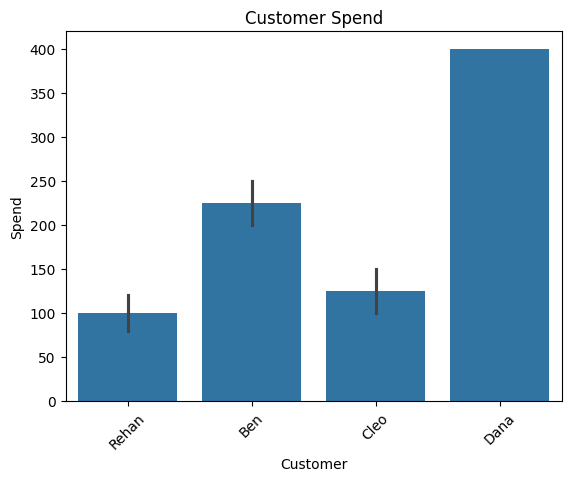

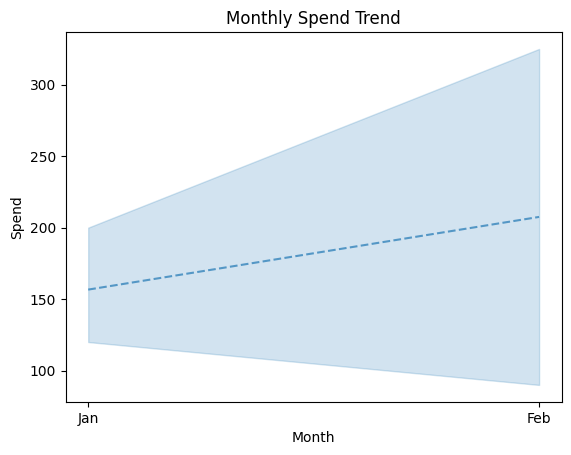

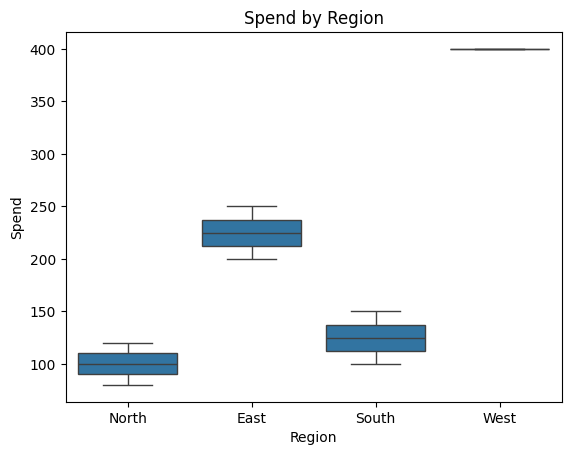

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Spend per customer
sns.barplot(x='Customer', y='Spend', data=df)
plt.title("Customer Spend")
plt.xticks(rotation=45)
plt.show()

# Line plot: Monthly trend
sns.lineplot(x='Month', y='Spend', data=df, linestyle='--', alpha=0.7)
plt.title("Monthly Spend Trend")
plt.show()

# Box plot: Region-wise Spend
sns.boxplot(x='Region', y='Spend', data=df)
plt.title("Spend by Region")
plt.show()

## *Step 4: CLV Calculation & Tier Segmentation*

In [37]:
# Customer Lifetime Value
df['CLV'] = df['Spend'] * df['Total_Orders']

# Tiering logic
df['Tier'] = df['Spend'].apply(lambda x: "Platinum" if x > 500 else "Gold" if x > 300 else "Regular")

# Average Spend by Tier
tier_avg = df.groupby('Tier')['Spend'].mean()
tier_avg


Tier
Gold       400.0
Regular    150.0
Name: Spend, dtype: float64

## *Visual Dashboard*

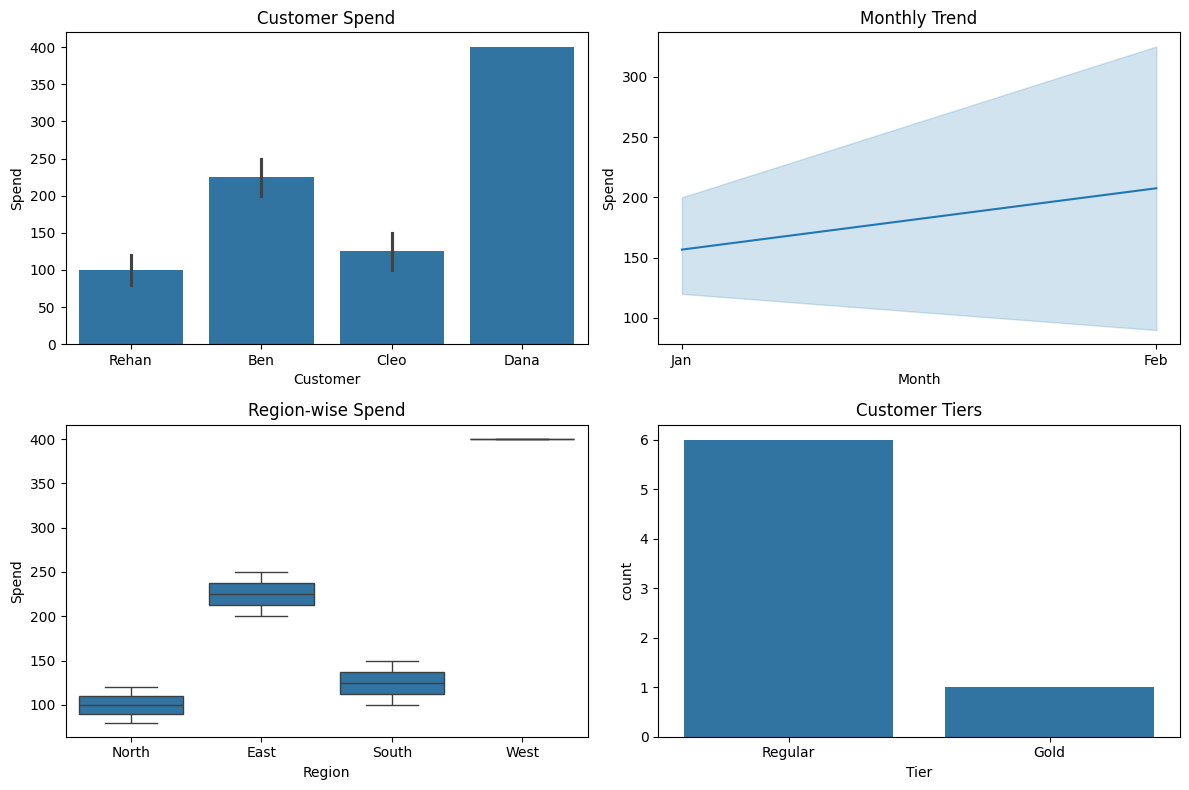

In [38]:
# 4-in-1 Visual Dashboard
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(x='Customer', y='Spend', data=df, ax=axs[0, 0])
axs[0, 0].set_title("Customer Spend")

sns.lineplot(x='Month', y='Spend', data=df, ax=axs[0, 1])
axs[0, 1].set_title("Monthly Trend")

sns.boxplot(x='Region', y='Spend', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Region-wise Spend")

sns.countplot(x='Tier', data=df, ax=axs[1, 1])
axs[1, 1].set_title("Customer Tiers")

plt.tight_layout()
plt.show()


##  📍*Conclusion*

This analysis showed me how valuable even small datasets can be. I practiced real concepts like CLV, churn, segmentation, and reporting using real visuals.